In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(1, 'C:/Users/provo501/Documents/GitHub/batch-bandits')
from CMAB.replay_env import ReplayEnvironment
from CMAB.LinTS import LinTSAgent
from utilities.plot_script import smooth
from utilities.run_experiment import run_experiment
from utilities.data_generator import generate_samples

In [2]:
# generate 100 000 samples with 4 features and 3 actions
dataset = generate_samples(100000, 4, 3, True)
dataset.head()

,X_1,X_2,X_3,X_4,a,y,probs
0,1,3,0,0,0.0,0.0,0.266661
1,3,1,3,1,1.0,0.0,0.236514
2,3,0,0,1,1.0,0.0,0.236514
3,0,3,1,0,1.0,0.0,0.236514
4,2,1,2,0,0.0,0.0,0.266661


In [3]:
num_experiments = 10
batch_size1 = 30
batch_size2 = 100
env_info = {'pickle_file': dataset}

agent1_info = {'alpha': 1,
              'num_actions': 3,
              'seed': 1,
              'batch_size': batch_size1,
              'replay_buffer_size': 100000}
agent2_info = {'alpha': 1,
                    'num_actions': 3,
                    'seed': 1,
                    'batch_size': batch_size2,
                    'replay_buffer_size': 100000}
experiment_parameters = {"num_runs": num_experiments}

In [4]:
agent = LinTSAgent
environment = ReplayEnvironment

result1 = run_experiment(environment, agent, env_info, agent1_info, experiment_parameters, False)
result2 = run_experiment(environment, agent, env_info, agent2_info, experiment_parameters, False)

smoothed_leveled_result1 = smooth(result1, 100)
smoothed_leveled_result2 = smooth(result2, 100)

mean_smoothed_leveled_result1 = np.mean(smoothed_leveled_result1, axis=0)
mean_smoothed_leveled_result2 = np.mean(smoothed_leveled_result2, axis=0)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:29<00:00,  2.98s/it]


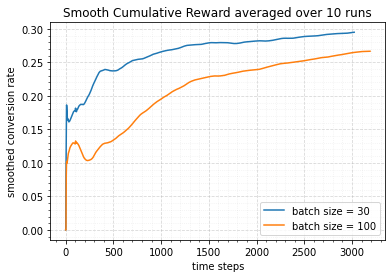

In [5]:
plt.plot(mean_smoothed_leveled_result1, label='batch size = ' + str(batch_size1))
plt.plot(mean_smoothed_leveled_result2, label='batch size = ' + str(batch_size2))
plt.legend()
plt.xlabel('time steps')
plt.title("Smooth Cumulative Reward averaged over {} runs".format(num_experiments))
plt.ylabel('smoothed conversion rate')
plt.grid(b=True, which='major', linestyle='--', alpha=0.5)
plt.minorticks_on()
plt.grid(b=True, which='minor', linestyle=':', alpha=0.2)
plt.show()